### Димпломная работа
<div class="alert alert-info">
    Выполнил: Вагин И.В.  
    08.2021

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

### 1. Загрузка данных

In [7]:
outfile = open('HR.csv', 'wb')
df = pd.read_csv(outfile)
outfile.close()

UnsupportedOperation: read

In [3]:
df = pd.read_csv('HR.csv')

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [205]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
7568,0.72,0.85,4,142,3,0,0,0,sales,medium
5700,0.99,0.71,4,199,4,0,0,0,support,medium
10824,0.77,0.50,3,141,3,0,0,0,IT,medium
12895,0.44,0.61,5,230,6,0,0,0,marketing,low
1918,0.39,0.53,2,146,3,0,1,0,sales,low


###   2. Расчет основных статистик для переменных

### Расчет основных статистик для столбца  - Уровень удовлетворенности работой

In [206]:
print(f' - Среднее:', round(df['satisfaction_level'].mean(),2))
print(f' - Медиана:', round(df['satisfaction_level'].median(),2))
df_min = round(df['satisfaction_level'].min(),2)
df_max = round(df['satisfaction_level'].max(),2)
print(f' - Мин/Макс/Размах:', df_min, '/', df_max, '/', df_max - df_min)
print(f' - Среднеквадратичное отклонение:', round(np.std(df['satisfaction_level']),2))

 - Среднее: 0.61
 - Медиана: 0.64
 - Мин/Макс/Размах: 0.09 / 1.0 / 0.91
 - Среднеквадратичное отклонение: 0.25


In [207]:
df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

### Расчет основных статистик для столбца - Время с момента последней оценки в годах

In [208]:
print(f' - Среднее:', round(df['last_evaluation'].mean(),2))
print(f' - Медиана:', round(df['last_evaluation'].median(),2))
df_min = round(df['last_evaluation'].min(),2)
df_max = round(df['last_evaluation'].max(),2)
print(f' - Мин/Макс/Размах:', df_min, '/', df_max, '/', df_max - df_min)
print(f' - Среднеквадратичное отклонение:', round(np.std(df['last_evaluation']),2))

 - Среднее: 0.72
 - Медиана: 0.72
 - Мин/Макс/Размах: 0.36 / 1.0 / 0.64
 - Среднеквадратичное отклонение: 0.17


In [209]:
df['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

### Расчет основных статистик для столбца - Количество проектов, выполненных за время работы

In [210]:
print(f' - Среднее:', round(df['number_project'].mean(),2))
print(f' - Медиана:', round(df['number_project'].median(),2))
df_min = round(df['number_project'].min(),2)
df_max = round(df['number_project'].max(),2)
print(f' - Мин/Макс/Размах:', df_min, '/', df_max, '/', df_max - df_min)
print(f' - Среднеквадратичное отклонение:', round(np.std(df['number_project']),2))

 - Среднее: 3.8
 - Медиана: 4.0
 - Мин/Макс/Размах: 2 / 7 / 5
 - Среднеквадратичное отклонение: 1.23


In [211]:
df['number_project'].describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

### Расчет основных статистик для столбца -  Среднее количество часов на рабочем месте в месяц

In [212]:
print(f' - Среднее:', round(df['average_montly_hours'].mean(),2))
print(f' - Медиана:', round(df['average_montly_hours'].median(),2))
df_min = round(df['average_montly_hours'].min(),2)
df_max = round(df['average_montly_hours'].max(),2)
print(f' - Мин/Макс/Размах:', df_min, '/', df_max, '/', df_max - df_min)
print(f' - Среднеквадратичное отклонение:', round(np.std(df['average_montly_hours']),2))

 - Среднее: 201.05
 - Медиана: 200.0
 - Мин/Макс/Размах: 96 / 310 / 214
 - Среднеквадратичное отклонение: 49.94


In [213]:
df['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

### Расчет основных статистик для столбца -  Стаж работы в компании в годах

In [214]:
print(f' - Среднее:', round(df['time_spend_company'].mean(),2))
print(f' - Медиана:', round(df['time_spend_company'].median(),2))
df_min = round(df['time_spend_company'].min(),2)
df_max = round(df['time_spend_company'].max(),2)
print(f' - Мин/Макс/Размах:', df_min, '/', df_max, '/', df_max - df_min)
print(f' - Среднеквадратичное отклонение:', round(np.std(df['time_spend_company']),2))

 - Среднее: 3.5
 - Медиана: 3.0
 - Мин/Макс/Размах: 2 / 10 / 8
 - Среднеквадратичное отклонение: 1.46


In [215]:
df['time_spend_company'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

### Вариант расчета всех количественных переменных с DESCRIBE в отдельном датафрейм

In [216]:
# В отдельный датафрейм сохраняем столбцы с количественными данными 
df_numeric = df.iloc[:,[0,1,2,3,4]]
df_numeric.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [217]:
# Создадим датафрейм с категориальными данными 
df_categorical  = df.iloc[:,[5,6,7,8,9]]
# Меняем числовые значения на категории в номинальных столбцах
df_categorical['Work_accident'].replace({1:'Yes', 0:'No'}, inplace = True)
df_categorical['left'].replace({1:'Yes', 0:'No'}, inplace = True)
df_categorical['promotion_last_5years'].replace({1:'Yes', 0:'No'}, inplace = True)
df_categorical.sample(5)

C:\Users\vagin\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Work_accident,left,promotion_last_5years,department,salary
9891,Yes,No,No,technical,medium
7018,No,No,No,RandD,high
10450,No,No,No,IT,low
1431,No,Yes,No,technical,medium
13498,No,No,No,sales,medium


### Расчет моды для столбцов с категориальными переменными 

In [218]:
print(f' - Происходили ли несчастные случаи на рабочем месте с сотрудником:', df_categorical['Work_accident'].mode()[0])
print(f' - Уволился ли сотрудник:', df_categorical['left'].mode()[0])
print(f' - Повышался ли сотрудник за последние пять лет:', df_categorical['promotion_last_5years'].mode()[0])
print(f' - Относительный уровень зарплаты:', df_categorical['salary'].mode()[0])

 - Происходили ли несчастные случаи на рабочем месте с сотрудником: No
 - Уволился ли сотрудник: No
 - Повышался ли сотрудник за последние пять лет: No
 - Относительный уровень зарплаты: low


### 3. Расчет и визуализация корреляции для количественных переменных

In [219]:
df_numeric.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


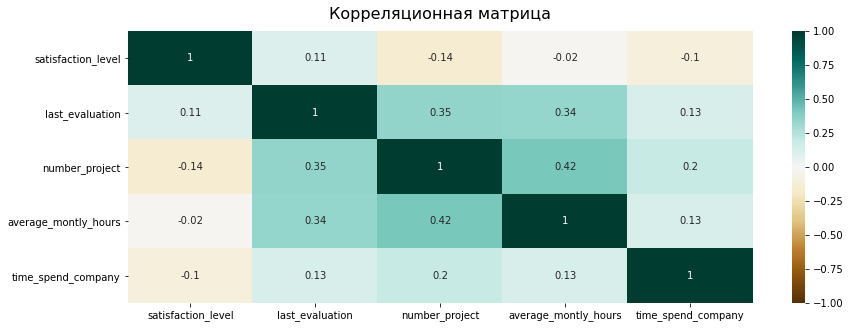

In [220]:
heatmap = plt.figure(figsize=(14, 5)) 
heatmap = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Корреляционная матрица', fontdict={'fontsize':16}, pad=12);

<div class="alert alert-info">
Наиболее скоррелированными переменными можно считать 'Среднее количество часов на рабочем месте в месяц' и 'Количество проектов, выполненных за время работы'. Вывод очевиден - чем больше сотрудник уделяет времени работе, тем больше он успевает и соответвественно большее количество проектов сдает. И эта тенденция прослеживается во всех отделах. 

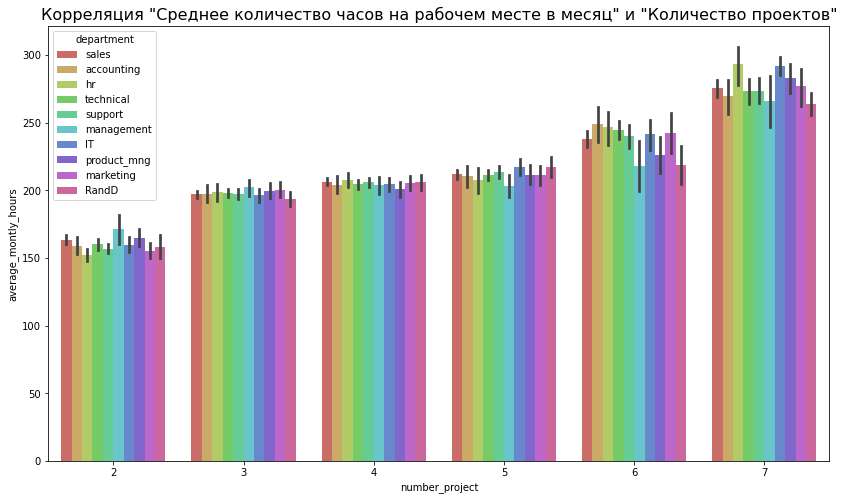

In [221]:
g = plt.figure(figsize=(14, 8))
g = sns.barplot(data=df, x='number_project', y='average_montly_hours', palette='hls', hue = 'department').set_title('Корреляция "Среднее количество часов на рабочем месте в месяц" и "Количество проектов"', fontsize=16)

<div class="alert alert-info">
Наименне скоррелированными переменными являются 'Количество проектов, выполненных за время работы'  и 'Уровень удовлетворенности работой'

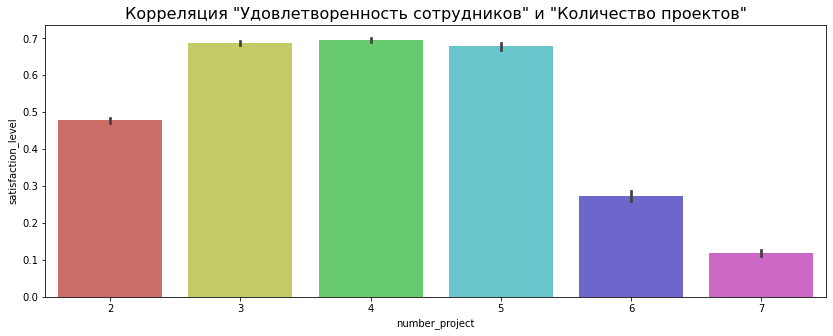

In [222]:
ax = plt.figure(figsize=(14, 5))
аx = sns.barplot(data=df, x='number_project', y='satisfaction_level', palette='hls').set_title('Корреляция "Удовлетворенность сотрудников" и "Количество проектов"', fontsize=16)

### 4. Расчет количества сотрудников в каждом отделе 

In [223]:
df_group = df[['department', 'salary']]
df_group.groupby('department').count()

,salary
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


### 5. Визуализация распределения сотрудников по зарплатам

In [224]:
df_group['id_employee'] = pd.Series(range(0,14999)) # Добавляем столбец id сотрудника

<ipython-input-224-3e44e526607c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['id_employee'] = pd.Series(range(0,14999)) # Добавляем столбец id сотрудника


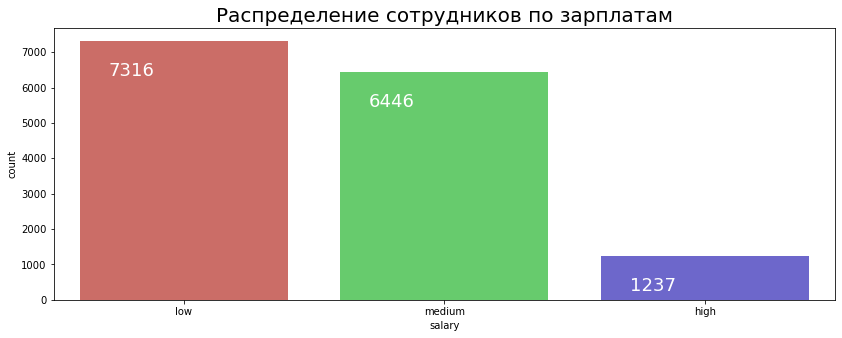

In [225]:
a1 = plt.figure(figsize=(14, 5))
a1 = sns.countplot(data=df_group, x='salary', palette='hls')
a1.set_title('Распределение сотрудников по зарплатам', fontsize=20)
for p in a1.patches:
    a1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

### 6. Визуализация распределения сотрудников по зарплатам в каждом отделе

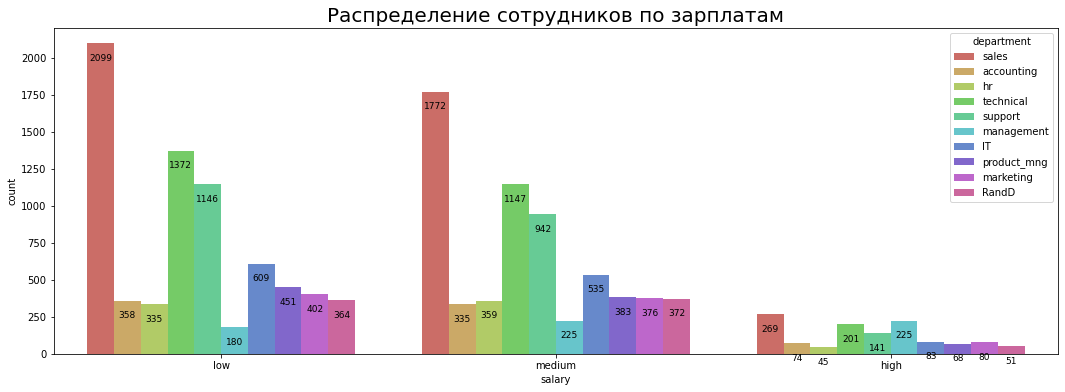

In [226]:
ax = plt.figure(figsize=(18, 6))
ax = sns.countplot(data=df_group, x='salary', palette='hls', hue='department')
ax.set_title('Распределение сотрудников по зарплатам', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.04, p.get_height()+2), ha='center', va='top', color='black', size=9)
plt.show()

### 7. Проверка гипотезы, что сотрудники с большим окладом проводят на работе больше времени, чем сотрудники с низким окладом. 

### Формулируем нулевую гипотезу: 
 Н0: Сотрудники с высокой ЗП проводят на работе столько же или меньше времени, чем сотрудники с низкой ЗП.  
 Н1: Сотрудники с высокой ЗП проводят на работе больше времени, чем сотрудники с низкой ЗП.  
 
 Уровень статистическеой значимости Alpha за неимением других данных будем принимать 0.05 

### Сформируем две выборки:
- Сотрудники с низкой ЗП 
- Сотрудники с высокой ЗП   

In [228]:
# Сотрудники с низкой ЗП
columns = ['average_montly_hours', 'salary']
salary_low = df.loc[df['salary'] == 'low'][columns]
salary_low.sample(3)

,average_montly_hours,salary
11418,237,low
2110,143,low
10594,139,low


In [229]:
# Сотрудники с высокой ЗП
salary_high = df.loc[df['salary'] == 'high'][columns]
salary_high.sample(3)

,average_montly_hours,salary
13816,179,high
7845,226,high
12886,191,high



### В следствие того, что сравниваем две выборки и необходимо определить в чью сторону перевес, будем использовать двухвыборочный двухсторонний критерий Т - Стьюдента. 

In [230]:
alpha = 0.05

result = st.ttest_ind(salary_high['average_montly_hours'], salary_low['average_montly_hours'], equal_var=False)
print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу - Сотрудники с высокой ЗП проводят на работе больше времени, чем сотрудники с низкой ЗП')
else:
    print('Не отвергаем нулевую гипотезу - Сотрудники с высокой ЗП проводят на работе столько же или меньше времени')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу - Сотрудники с высокой ЗП проводят на работе столько же или меньше времени


### По результатам теста получаем, что в среднем сотрудники с маленькой ЗП проводят чуть больше времени чем сотрудники с высокой ЗП. Но эта разница статистически незначима т.к. P-value = 0.44. А значит не отвергаем нулевую гипотезу  - Сотрудники с высокой ЗП проводят на работе столько же или меньше времени, чем сотрудники с низкой ЗП.

Посмотрим разницу визуально 

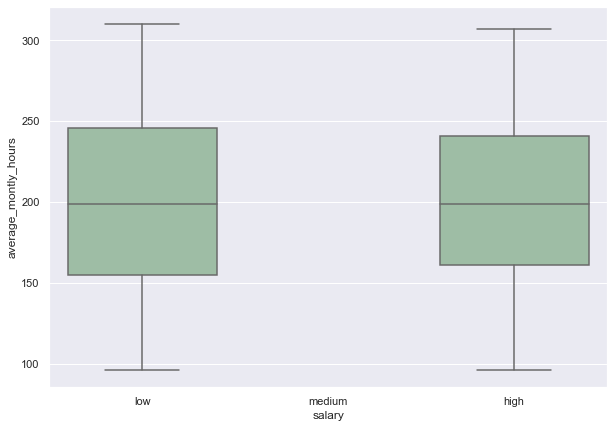

In [231]:
sns.set(rc={'figure.figsize':(10, 7)}) 
ax = sns.boxplot(x=df['salary'], y=salary_low['average_montly_hours'], data=df, color='#99c2a2')
ax = sns.boxplot(x=df['salary'], y=salary_high['average_montly_hours'], data=df, color='#99c2a2')
plt.show()

### 8. Расчет показателей среди уволишихся и не уволишихся сотрудников. 

In [232]:
# Создадим выборку с уволившимися сотрудниками 
columns = ['promotion_last_5years', 'satisfaction_level', 'number_project', 'left']
df['left'].replace({1:'Yes', 0:'No'}, inplace = True)
df['promotion_last_5years'].replace({1:'Yes', 0:'No'}, inplace = True)
df_left_yes = df.loc[df['left'] == 'Yes'][columns]
df_left_yes.sample(5)

,promotion_last_5years,satisfaction_level,number_project,left
331,No,0.11,7,Yes
479,No,0.11,7,Yes
1331,No,0.09,6,Yes
777,No,0.11,6,Yes
14497,No,0.11,6,Yes


In [233]:
# Создадим выборку с работающими на данный момент сотрудниками 
columns = ['promotion_last_5years', 'satisfaction_level', 'number_project', 'left']
df_left_no = df.loc[df['left'] == 'No'][columns]
df_left_no.sample(5)

,promotion_last_5years,satisfaction_level,number_project,left
4681,No,0.65,4,No
13657,No,0.31,3,No
6119,No,0.75,3,No
9879,No,0.89,3,No
4525,No,0.91,6,No


#### Доля сотрудников с повышением за последниие 5 лет. 

In [234]:
a = round(df_left_yes['promotion_last_5years'].count()/df.promotion_last_5years.count()*100, 0)
print(f'Доля сотрудников с повышением за последнии 5 лет среди уволившихся:', a, '%')

Доля сотрудников с повышением за последнии 5 лет среди уволившихся: 24.0 %


In [235]:
b = round(df_left_no['promotion_last_5years'].count()/df.promotion_last_5years.count()*100, 0)
print(f'Доля сотрудников с повышением за последнии 5 лет среди работающих:', b, '%')

Доля сотрудников с повышением за последнии 5 лет среди работающих: 76.0 %


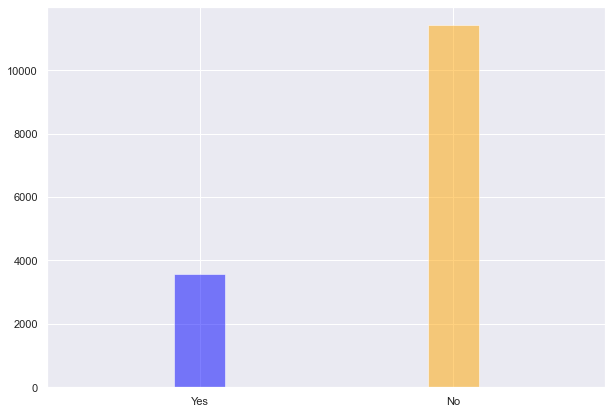

In [236]:
plt.hist(df_left_yes['left'], color='blue', alpha=0.5, bins=5); 
plt.hist(df_left_no['left'], color='orange',  alpha=0.5, bins=5);

#### Средняя степень удовлетворенности. 

In [240]:
c = round(df_left_yes['satisfaction_level'].mean(),2)
d = round(df_left_no['satisfaction_level'].mean(),2)
print(f'Средняя степень удовлетворенности: \n - уволившиеся сотрудники ', c, '\n','- работающие сотрудники', d)

Средняя степень удовлетворенности: 
 - уволившиеся сотрудники  0.44 
 - работающие сотрудники 0.67


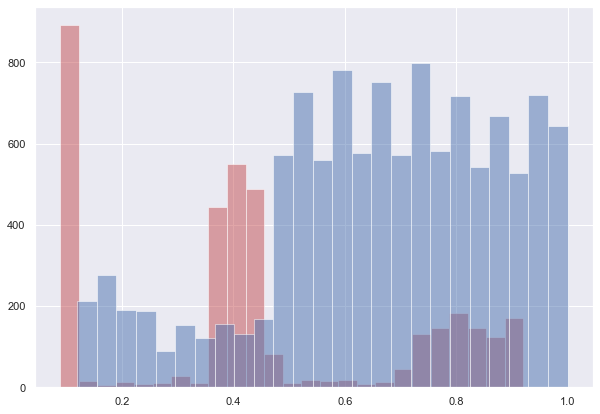

In [241]:
plt.hist(df_left_yes['satisfaction_level'], color='r', alpha=0.5, bins=25); 
plt.hist(df_left_no['satisfaction_level'], color='b',  alpha=0.5, bins=25);

#### Среднее количество проектов. 

In [242]:
e = round(df_left_yes['number_project'].mean(),2)
f = round(df_left_no['number_project'].mean(),2)
print(f'Среднее количество проектов: \n - уволившиеся сотрудники ', e, '\n','- работающие сотрудники', f)

Среднее количество проектов: 
 - уволившиеся сотрудники  3.86 
 - работающие сотрудники 3.79


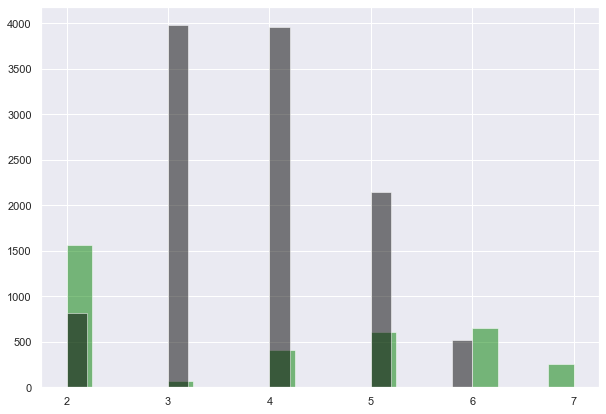

In [243]:
plt.hist(df_left_yes['number_project'], color='green', alpha=0.5, bins=20); 
plt.hist(df_left_no['number_project'], color='black',  alpha=0.5, bins=20);

### 9. Построение модели предсказывающей уволился ли сотрудник на основе имеющихся факторов (кроме department  и  salary)

#### Построение модели с помощью  LinearDiscriminantAnalysis

In [244]:
from sklearn.model_selection import train_test_split
# Импорт LDA  функционала
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [245]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2690,0.75,0.93,2,98,5,0,No,No,sales,medium
1858,0.38,0.47,2,128,3,0,Yes,No,sales,medium
2458,0.18,0.75,4,170,5,0,No,No,sales,low
7283,0.75,0.82,3,169,3,0,No,No,hr,low
395,0.45,0.46,2,128,3,0,Yes,No,sales,low


In [246]:
# В отдельный датафрейм сохраняем нужные столбцы с данными 
df_lda = pd.read_csv('HR.csv')
df_lda = df_lda.iloc[:,[0,1,2,3,4,5,7]]
df_lda.sample(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
4987,0.59,0.62,3,219,3,0,0
11,0.11,0.81,6,305,4,0,0
13114,0.80,0.62,5,190,4,1,0


In [247]:
target_value = df['left']

In [248]:
# Разделяем выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(df_lda, target_value, test_size=0.3)

In [249]:
y_train

14034     No
6850      No
4227      No
12461    Yes
1017     Yes
        ... 
3063      No
1200     Yes
11887     No
3537      No
2859      No
Name: left, Length: 10499, dtype: object

In [250]:
lda = LinearDiscriminantAnalysis()

In [251]:
# Обучаем наши данные 
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [252]:
# Выводим результат прогноза 
lda.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [253]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.sample(10)

,left,Unnamed 0
14410,Yes,NaN
7526,No,NaN
11215,No,NaN
9869,No,NaN
11034,No,NaN
7828,No,NaN
10351,No,NaN
9412,No,NaN
11617,No,NaN
8699,No,NaN


In [254]:
# Только для 30% тестовой выборки получилось сделать прогноз. Почему остальные Nan? 
print(result.shape)
print(result['Unnamed 0'].count())
result.groupby('Unnamed 0').count()

(4500, 2)
1372


,left
Unnamed 0,
No,1221
Yes,151


In [255]:
# Проверка точности прогноза 
accuracy_score(y_test, lda.predict(X_test))

0.7731111111111111

#### Построение модели с помощью RandomForestClassifier

In [256]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [257]:
# Выводим результат прогноза 
rf.predict(X_test)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [258]:
rf_result = pd.DataFrame([y_test, rf.predict(X_test)]).T
rf_result.sample(10)

,left,Unnamed 0
780,Yes,No
6540,No,NaN
5139,No,NaN
6100,No,NaN
5907,No,NaN
3908,No,No
11035,No,NaN
7940,No,NaN
11522,No,NaN
9181,No,NaN


In [259]:
# Только для 30% тестовой выборки получилось сделать прогноз. Почему остальные Nan? 
print(rf_result.shape)
print(rf_result['Unnamed 0'].count())
rf_result.groupby('Unnamed 0').count()

(4500, 2)
1372


,left
Unnamed 0,
No,1052
Yes,320


In [260]:
accuracy_score(y_test, rf.predict(X_test))

0.9913333333333333